In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 

In [4]:
df=pd.read_csv(r'C:/Users/AL MADINA COMPUTER/Desktop/Machine Learning/multivariate_regression.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [7]:
df.isnull().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [8]:
df.bedrooms.median()

4.0

In [9]:
df['bedrooms']=df.bedrooms.fillna(df.bedrooms.median())

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


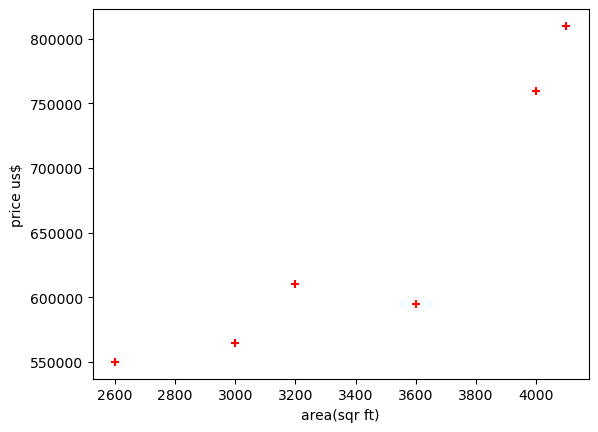

In [10]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price us$')
plt.scatter(df.area, df.price, color='red', marker='+')


# Create a modle for linear regression

In [20]:
new_df=df.drop('price', axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [21]:
price=df.price

In [23]:
reg=linear_model.LinearRegression()
#reg.fit(df[['area']]),df.price)
reg.fit(new_df, price)

LinearRegression()

In [32]:
reg.predict([[3000]])

C:\Users\AL MADINA COMPUTER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([587979.45205479])

In [33]:
reg.coef_

array([135.78767123])

In [34]:
reg.intercept_

180616.43835616432

# Prediction of price across size of area

In [41]:
d=pd.read_csv('C:/Users/AL MADINA COMPUTER/Desktop/Machine Learning/linearpredicted.csv')
d.head(2)

,area
0,2000
1,3456


In [42]:
p=reg.predict(d)

In [43]:
d['Prices']=p

In [44]:
d.to_csv('C:/Users/AL MADINA COMPUTER/Desktop/Machine Learning/linearpredicted_1.csv', index=False)

# Plotting of predicted data set

In [ ]:
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')